# Hands On - Predicting The Quality Of Wine - Introduction to Regression Models

# Import Data & Check Structure



## Import

In [1]:
import pandas as pd
wine = pd.read_csv("https://raw.githubusercontent.com/casbdai/datasets/main/wine_regression.csv")

## Checking Structure

In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vintage           38 non-null     int64  
 1   price             38 non-null     int64  
 2   winter.rain       38 non-null     float64
 3   harvest.rain      38 non-null     float64
 4   grow.temp         38 non-null     float64
 5   harvest.temp      38 non-null     float64
 6   purchasing.power  38 non-null     float64
 7   age               38 non-null     int64  
dtypes: float64(5), int64(3)
memory usage: 2.5 KB


In [3]:
wine.head()

,vintage,price,winter.rain,harvest.rain,grow.temp,harvest.temp,purchasing.power,age
0,1952,57,583.0,226.0,17.7,14.3,7785.5,69
1,1953,80,690.0,133.0,16.6,17.3,8022.8,68
2,1954,8,418.0,125.0,15.1,16.8,8328.1,67
3,1955,65,621.0,96.0,17.2,16.8,8683.1,66
4,1956,18,445.0,73.0,15.3,17.3,9129.6,65


Vintage and age carry the same information. Age is only a mathematical transformation of the vintage year.

Taking 2021 as "reference year": 2021 - 1952 = 69

Thus, we delete the variable "vintage":


In [4]:
wine = wine.drop("vintage", axis = 1)
wine.head()

,price,winter.rain,harvest.rain,grow.temp,harvest.temp,purchasing.power,age
0,57,583.0,226.0,17.7,14.3,7785.5,69
1,80,690.0,133.0,16.6,17.3,8022.8,68
2,8,418.0,125.0,15.1,16.8,8328.1,67
3,65,621.0,96.0,17.2,16.8,8683.1,66
4,18,445.0,73.0,15.3,17.3,9129.6,65


## Separate Features and Targets

In [5]:
X = wine.drop("price", axis = 1)
y = wine["price"]

# Workflow for Simple Linear Regression

### 1) Import Model Function

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

### 2) Instantiate Model

In [7]:
linreg = LinearRegression()

### 3) Create Test & Training Data

We want to mantain the temporal order of the data set. So, we set the additional attribute "shuffle" to False.

Checkout what happens, if we set it to True!


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, shuffle=False)

In [9]:
X_train.tail()

,winter.rain,harvest.rain,grow.temp,harvest.temp,purchasing.power,age
28,742.0,207.0,15.8,18.9,21435.9,41
29,499.0,218.0,16.8,18.0,21505.9,40
30,763.0,297.0,17.2,18.5,21993.0,39
31,780.0,63.0,17.3,17.8,22078.4,38
32,797.0,236.0,16.6,16.0,22234.0,37


In [10]:
X_test.head()

,winter.rain,harvest.rain,grow.temp,harvest.temp,purchasing.power,age
33,766.0,18.0,16.4,18.9,22555.6,36
34,715.0,200.0,16.0,17.5,23110.9,35
35,461.0,217.0,16.6,18.9,23616.4,34
36,850.0,92.0,17.2,17.5,24571.3,33
37,499.7,68.0,18.5,18.2,25289.1,32


#### Selecting "Harvest Temperatur" Variable and redo splitting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,["harvest.temp"]], y, test_size=0.12, shuffle=False)
print(X_train.tail())
print(X_test.head())

    harvest.temp
28          18.9
29          18.0
30          18.5
31          17.8
32          16.0
    harvest.temp
33          18.9
34          17.5
35          18.9
36          17.5
37          18.2


### 4) Fit Model to Data

In [12]:
linreg.fit(X_train,y_train)

LinearRegression()

### 5) Make Predictions on Test Data

In [13]:
y_pred = linreg.predict(X_test)
y_pred

array([50.14832736, 36.67054027, 50.14832736, 36.67054027, 43.40943382])

### 6) Evaluate Performance

In [14]:
root_mean_squared_error(y_test, y_pred)

19.392029259990757

## Further investigate results

### Get Regression Coefficient

In [15]:
linreg.coef_

array([9.62699078])

For each additional degree Celsius in the harvest season, the price of wine is increasing by 9.63 units!

### Calculate MAPE

In [16]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.7321886628800365

### Draw Regression Line

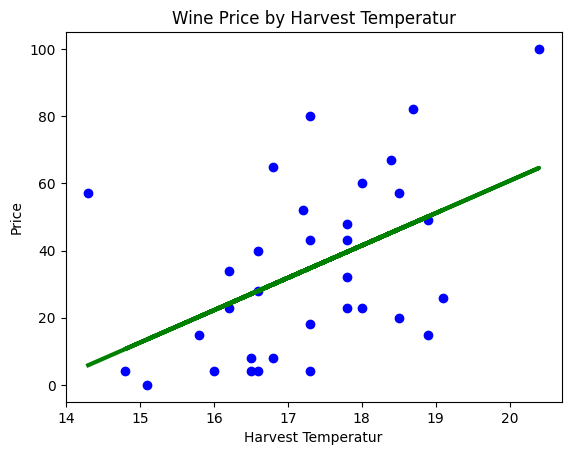

<Figure size 2000x1000 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

y_pred = linreg.predict(X_train)

plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, list(y_pred), color='green', linewidth=3)
plt.title("Wine Price by Harvest Temperatur")
plt.xlabel("Harvest Temperatur")
plt.ylabel("Price")
plt.figure(figsize=(20,10))

plt.show()

### Understanding Nature of Effects

SKLearn does not calculate significance levels - We need to redo the analysis with a different software library ("statsmodel"), if we want that information.

The following function is doing that for us:

In [18]:
def get_summary_report(X_train, y_train):
  import statsmodels.api as sm
  X_train = sm.add_constant(X_train, prepend=False)
  linreg_sm  = sm.OLS(y_train, X_train)
  results = linreg_sm.fit()
  return results

Let's execute that function! The regression coefficient is identical

In [19]:
regression_results = get_summary_report(X_train, y_train)
print(regression_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     9.417
Date:                Mon, 31 Mar 2025   Prob (F-statistic):            0.00444
Time:                        18:45:27   Log-Likelihood:                -149.85
No. Observations:                  33   AIC:                             303.7
Df Residuals:                      31   BIC:                             306.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
harvest.temp     9.6270      3.137      3.069   

# Workflow for Multipe Linear Regression

### 1) Import Model Function

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 2) Instantiate Model

In [21]:
linreg_full = LinearRegression()

### 3) Create Test and Training Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, shuffle=False)

### 4) Fit Model to Data


In [23]:
linreg_full.fit(X_train,y_train)

LinearRegression()

### 5) Make Predictions on Test Data

In [24]:
y_pred = linreg_full.predict(X_test)
y_pred

array([38.14393048,  3.64749921, 14.44944175, 37.08987473, 54.72031481])

### 6) Evaluate Performance

In [25]:
root_mean_squared_error(y_test, y_pred)

17.394945061631702

In [26]:
mean_absolute_percentage_error(y_test, y_pred)

0.5365910256492414

## Further Investigate Results

In [27]:
results = get_summary_report(X_train, y_train)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     10.79
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           4.98e-06
Time:                        18:45:27   Log-Likelihood:                -133.60
No. Observations:                  33   AIC:                             281.2
Df Residuals:                      26   BIC:                             291.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
winter.rain          0.0433      0.020  

In [28]:
X_train.corr()

,winter.rain,harvest.rain,grow.temp,harvest.temp,purchasing.power,age
winter.rain,1.000000,-0.108765,-0.085802,0.209912,0.329371,-0.343510
harvest.rain,-0.108765,1.000000,0.397714,-0.168450,0.068729,-0.089597
grow.temp,-0.085802,0.397714,1.000000,0.132908,0.157726,-0.150862
harvest.temp,0.209912,-0.168450,0.132908,1.000000,0.160774,-0.176902
purchasing.power,0.329371,0.068729,0.157726,0.160774,1.000000,-0.993834
age,-0.343510,-0.089597,-0.150862,-0.176902,-0.993834,1.000000


purchasing.power and age are super strongly correlated. It is almost a perfect negative correlation (-1). Such high correlations can cause problems in many algorithms. All correlations of > 0.7 and < - 0.7 should be considered cautiously.

<Axes: xlabel='purchasing.power', ylabel='age'>

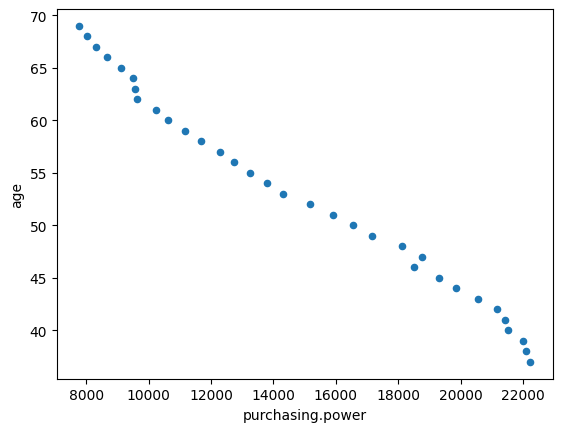

In [29]:
X_train.plot(kind="scatter", x="purchasing.power",y="age")

## Re-run Model

drop pruchasing.power from dataset

In [30]:
X = X.drop("purchasing.power", axis = 1)

Rerun model in identical fashion

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, shuffle=False)
linreg_full.fit(X_train,y_train)
y_pred = linreg_full.predict(X_test)
y_pred

array([35.0296927 ,  1.43831076, 12.12129208, 35.12514578, 52.43219844])

In [32]:
results = get_summary_report(X_train, y_train)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     13.25
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           1.44e-06
Time:                        18:45:28   Log-Likelihood:                -133.77
No. Observations:                  33   AIC:                             279.5
Df Residuals:                      27   BIC:                             288.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
winter.rain      0.0443      0.020      2.226   

**Now, we have much more intuively understandable results !!!**

In [33]:
print(root_mean_squared_error(y_pred, y_test))
print(mean_absolute_percentage_error(y_test, y_pred))

17.129785239567084
0.5225147508794417


## Actual Vs Predicted Plot

In [34]:
def actual_vs_predicted_plot(y_true, y_pred):
  import numpy as np
  import matplotlib.pyplot as plt
  min_value=np.array([y_true.min(), y_pred.min()]).min()
  max_value= min=np.array([y_true.max(), y_pred.max()]).max()
  fig = plt.figure()
  ax = fig.gca()
  ax.scatter(y_true,y_pred, color="blue")
  ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="green")
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.show()

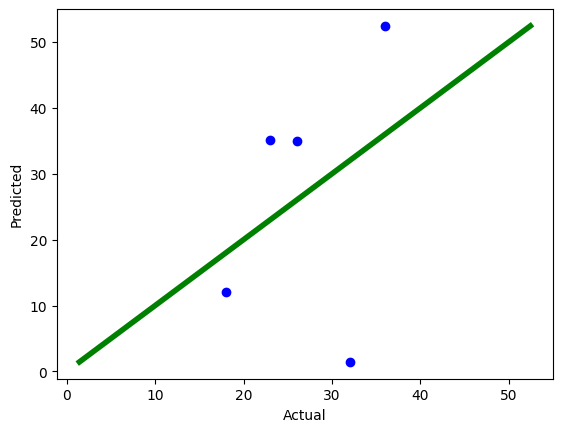

In [35]:
actual_vs_predicted_plot(y_test, y_pred)

# Regression Tree

The logic is almost identical we have to import and instantiate the DecisionTreeRegressor - all else is copy & paste

### 1) Import Model Function

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

### 2) Instantiate Model

In [37]:
tree = DecisionTreeRegressor(random_state=11)

we add random_state to get identical results everywhere (they can vary a bit for regression trees)

### 3) Create Test and Training Data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, shuffle=False)

### 4) Fit Model to Data

In [39]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=11)

### 5) Make Predictions on Test Data

In [40]:
y_pred = tree.predict(X_test)

### 6) Evaluate Performance

In [41]:
root_mean_squared_error(y_test, y_pred)

11.74734012447073

In [42]:
mean_absolute_percentage_error(y_test, y_pred)

0.3801816239316239

The Decision Tree Regressor is so far our best model!

### Plot Tree

In [43]:
def plot_tree_regression(treemodel, X_train):
    from sklearn import tree
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(60,20))
    _ = tree.plot_tree(treemodel, feature_names=X_train.columns, filled=True, precision=2)

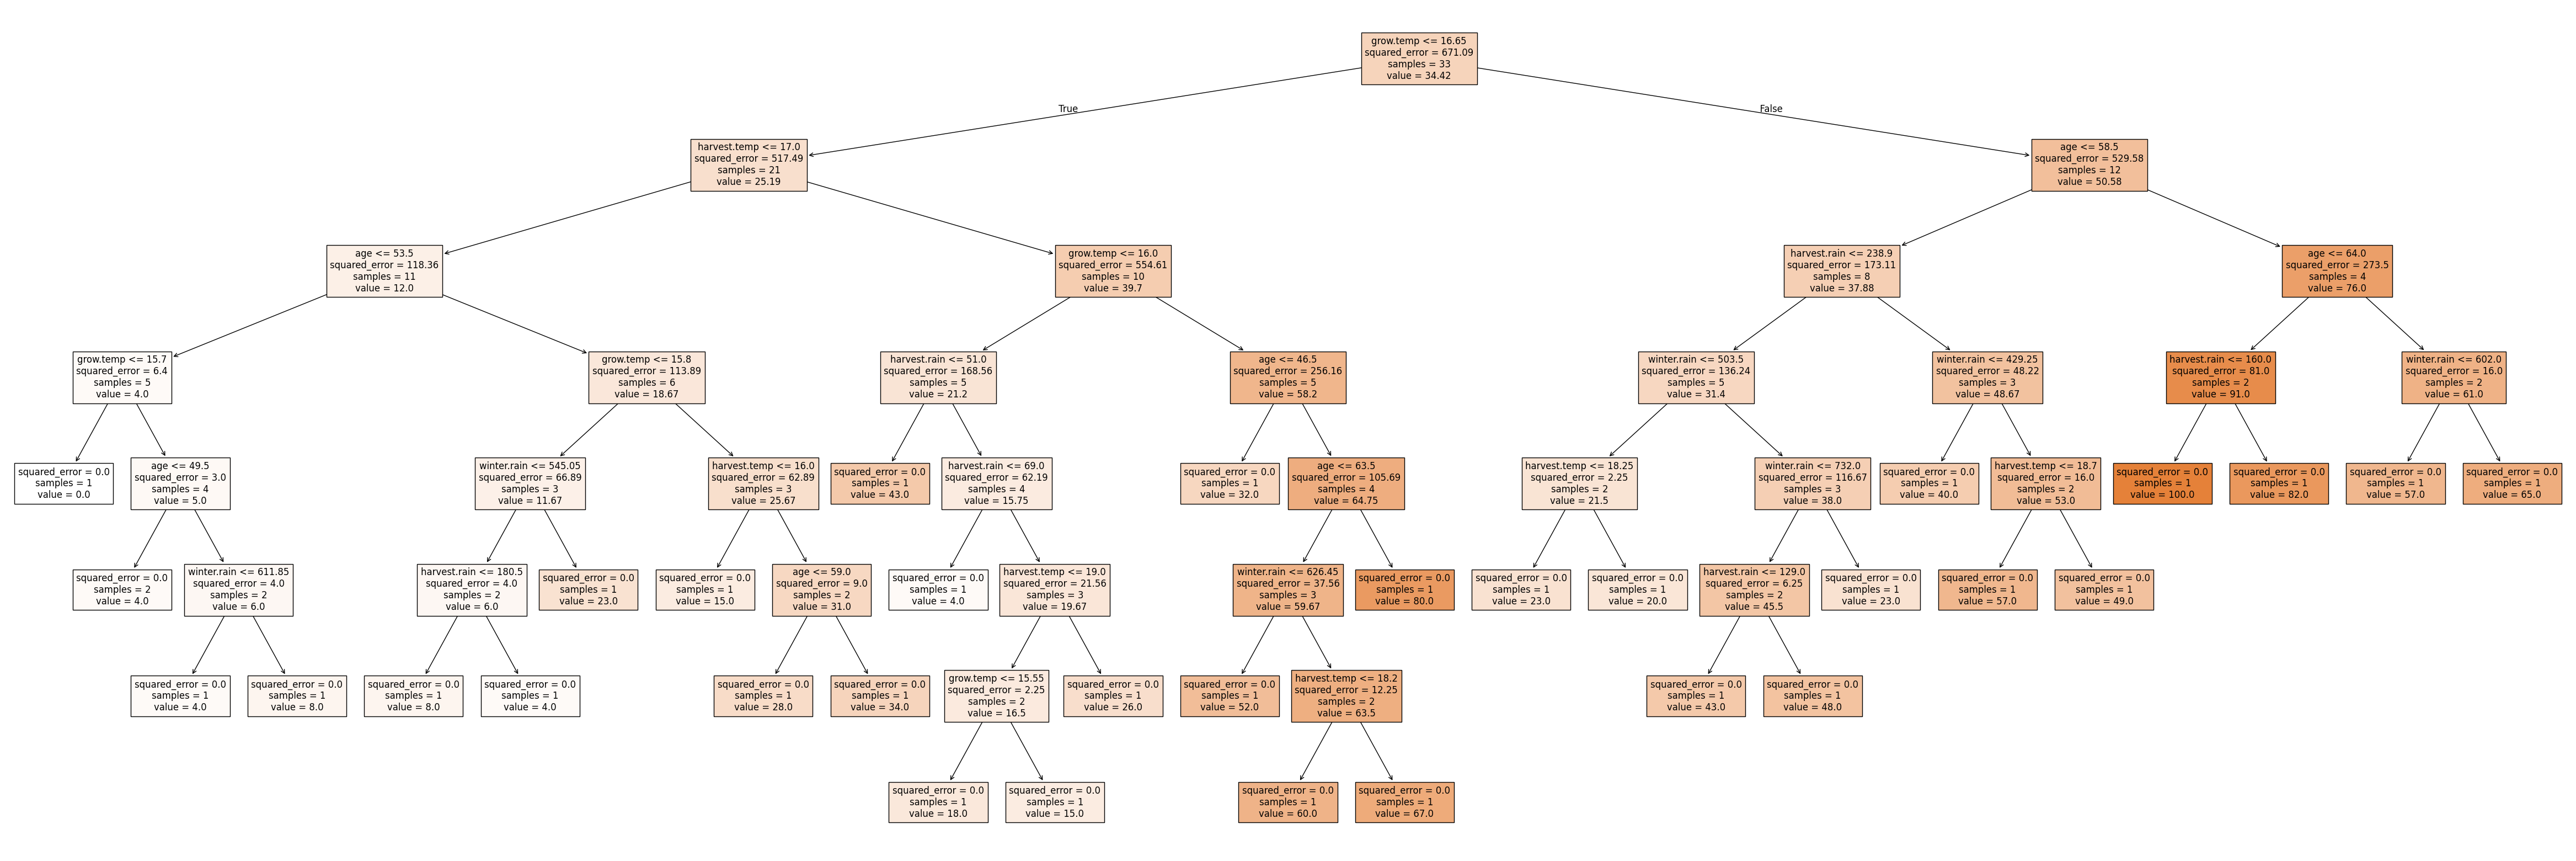

In [44]:
plot_tree_regression(tree, X_train)